# Работа с Sage

Мы будем использовать систему компьютерной алгебры [SageMath](http://sagemath.org/) для решения некоторой задачи.
Она чем-то похожа на грандов Maple и Mathematica, но состоит из нескольких десятков отдельных программ и библиотек, объединенных общим интерфейсом.

Это свободно распространяемая программа.
Пользоваться ей можно как установив программу на свой компьютер, так и используя один из сервисов через интернет.

В качестве основы в SageMath используется язык общего назначения Python 3.
Почитайте несколько первых пунктов введения на русском языке [Tutorial](https://doc.sagemath.org/html/ru/tutorial/tour.html), которого будет достаточно для начала.

## Завершение

Мы решаем такую задачу:
> Представьте, что есть _наблюдатель_, _объект наблюдения_ и некоторая _преграда_.  
> Нужно определить, видит ли наблюдатель этот объект или нет.

Будем использовать _трассировку лучей_: выпустим луч от _наблюдателя_ к _объекту_ и если он пересекает _преграду_, то ответ "Не видит", иначе - ответ "Видит".

![img](https://upload.wikimedia.org/wikipedia/commons/thumb/8/83/Ray_trace_diagram.svg/320px-Ray_trace_diagram.svg.png)

Предполагаем, что _объект наблюдения_ - точка (ясно, что это частный случай более общей ситуации), а _преграда_ - плоский многоугольник P.
Все задано декартовыми координатами точек в трехмерном пространстве.

Запланированы были следующие шаги:

1. [x] Найдем пересечение X отрезка от _наблюдателя_ до _объекта_ с плоскостью _преграды_.
2. [x] Преобразуем координаты P и X в координаты на плоскости P.
3. [ ] Определим, лежит ли X внутри многоугольника P.

Обсудим последний шаг в этом списке.

Стоит договориться, что мы рассмотрим простой, без самопересечений, многоугольник P, выпуклый или нет.
Существует несколько известных способов определения лежит ли точка X внутри P.  
Один из них такой: выпустим из X луч и посчитаем количество пересечений этого луча с ребрами P; если оно нечетно, то X внутри P.  
Луч с каждым пересечением либо "входит" в многоугольник, либо "выходит" из него.
Правда есть и особенности: пересечение лучом вершин, ...
Но не будем об этом пока (и от этого есть разные трюки, например, выпустить другой луч).

Пришло время примеров.

__Задача 1.__ По координатам точек $A,B,C,D$ определить, пересекает ли прямая $AB$ отрезок $CD$.

In [1]:
def is_line_cross_segment(A,B,C,D):
    """
    Функция определяет ...
    """
    AC = C-A
    AD = D-A
    AB = B-A
    sign_C = sign(matrix([AC,AB]).det())  # это как умножить AC на перпендикуляр к AB,
    sign_D = sign(matrix([AD,AB]).det())  # и знак определит остроту-тупость угла
    if sign_C == sign_D:
        return False
    else:
        return True

In [2]:
A, B, C, D = vector((0,0)), vector((1,2)), vector((3,4)), vector((-1,2))

In [3]:
A, B, C, D = map(vector, [(0, 0), (1, 2), (3, 4), (-1, 2)])

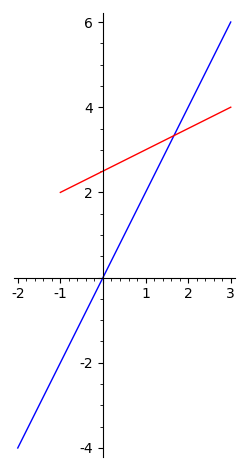

In [4]:
AB = B-A
pic = parametric_plot(A+x*AB, (x, -2, 3), color='blue') + line([C,D], color='red')
show(pic)

In [5]:
is_line_cross_segment(A,B,C,D)

True

А теперь эти проверки можно делать массово:

In [6]:
E, F = vector((0,-2)), vector((2,1))

In [7]:
segments = [[C,D], [E,F], [E,C], [E,D]]
for seg in segments:
    print(is_line_cross_segment(A,B,seg[0],seg[1]))

True
False
False
True


## Что делать

Напишите функции, которые бы решали следующие задачи.

__Задача 2.__ По координатам точек $A,B,C,D$ определить, пересекает ли луч $AB$ отрезок $CD$.

Теперь мы готовы для решения

__Задача 3.__ По координатам точек L, S и списку координат вершин плоского многоугольника P определить, пересекает ли отрезок LS многоугольник P.

In [ ]:
# тест 1 - да
S = vector([0,0,0])
L = vector([3,3,2])
P = [[2,0,0], [2,0,2], [0,2,2], [0,2,0]]

In [ ]:
# тест 2 - нет
S = vector((-41/5, -101/5, -32/5))
L = vector((19/5, -41/5, 28/5))
P = [(-2, -8, -2), (-3, -12, -3), (-8, -14, 1),
     (-3, -18, -6), (-1, -22, -10), (4, -20, -14),
     (5, -16, -13), (3, -12, -9), (1, -8, -5)]

In [ ]:
# тест 3 - ?
S = vector((-7, -19, -7))
L = vector((2, -10, 2))
P = [(-2, -8, -2), (-3, -12, -3), (-8, -14, 1),
     (-3, -18, -6), (-1, -22, -10), (4, -20, -14),
     (5, -16, -13), (3, -12, -9), (1, -8, -5)]